# FASHION MNIST CLASSIFICATION 


Fashion-MNIST is a dataset of **Zalando’s** article images consisting of a training set of **60,000** examples and a test set of **10,000** examples. Each example is a 28×28 grayscale image, associated with a label from **10 classes**. Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

<img src="https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png">

**Why is this of interest for the scientific community? **

The original MNIST dataset contains a lot of handwritten digits. People from AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. “If it doesn’t work on MNIST, it won’t work at all”, they said. “Well, if it does work on MNIST, it may still fail on others.”

Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset to benchmark machine learning algorithms, as it shares the same image size and the structure of training and testing splits.

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  <br>

**0 => T-shirt/top<br>
1 => Trouser<br>
2 => Pullover<br>
3 => Dress<br>
4 => Coat<br>
5 => Sandal<br>
6 => Shirt<br>
7 => Sneaker<br>
8 => Bag<br>
9 => Ankle boot **

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 


# STEP #2: IMPORTING ESSENTIAL LIBRARIES

In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [0]:
! pip install pydrive --upgrade

    100% |████████████████████████████████| 993kB 21.4MB/s 
  Running setup.py bdist_wheel for pydrive ... - done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
myfile = drive.CreateFile({'id': '1qxMxf8g3FVe4eEqc88cI0MOcKStYMPhV'})
myfile.GetContentFile('fashion-mnist_train.csv')

In [0]:
import pandas as pd
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')

In [0]:
myfile1 = drive.CreateFile({'id': '1GXTlot2SP6nNhQdvW0uzO9QBY_pHHEQ1'})
myfile1.GetContentFile('fashion-mnist_test.csv')

In [0]:
import pandas as pd
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [16]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# STEP #3: VISUALIZATION OF THE DATASET  

In [0]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

In [0]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

In [0]:
# Let's view the head of the testing dataset
fashion_test_df.head()

In [17]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [18]:
fashion_train_df.shape

(60000, 785)

In [0]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [20]:
training.shape

(60000, 785)

In [0]:
training

In [0]:
testing

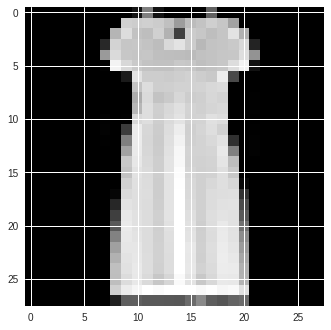

In [21]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [22]:
label = training[i,0]
label


3.0

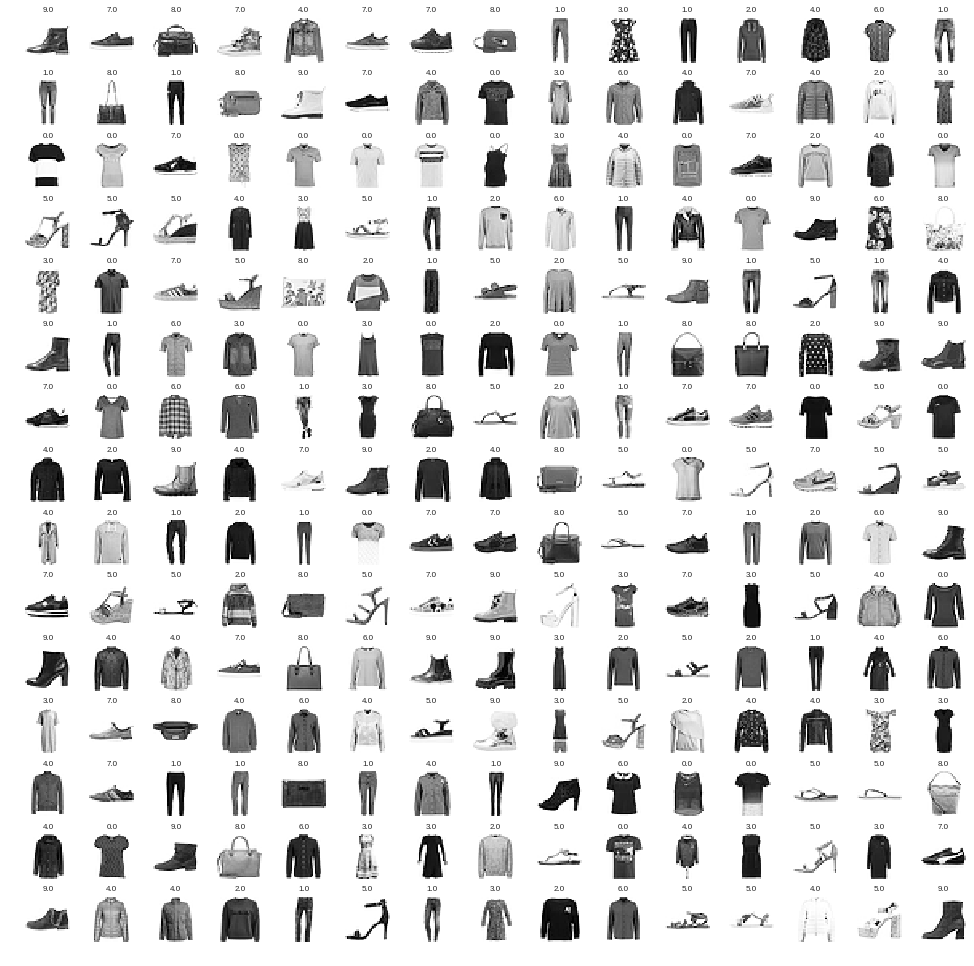

In [23]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [0]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

# Splitting Training and Validation Set

I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.1, random_state = 12345)

In [26]:
X_train.shape

(54000, 784)

In [27]:
y_train.shape

(54000,)

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [29]:
X_train.shape

(54000, 28, 28, 1)

In [30]:
X_test.shape

(10000, 28, 28, 1)

In [31]:
X_validate.shape

(6000, 28, 28, 1)

# Convolutional Neural Network

**Define Model**

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [0]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32,(5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(Conv2D(32,(5, 5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(activation = 'relu', units=32))
cnn_model.add(Dense(activation = 'softmax', units=10))


I choosed **Adam optimizer**.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

Adam as combines the advantages of two other extensions of stochastic gradient descent. Specifically:

**Adaptive Gradient Algorithm (AdaGrad)** that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

**Root Mean Square Propagation (RMSProp)** that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).
Adam realizes the benefits of both AdaGrad and RMSProp.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# Annealing : Learning Rate Reduction
In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

I choosed batch size to be 64

Batch size is mainly a constraint on your own computer. The larger the batch size, the more data your chunking into your memory that your model will train on. The small the batch size, the less data, but your computation will be slower.

It's a tradeoff between speed and memory.

In [68]:
epochs = 50
batch_size=64
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 2,
                        validation_data = (X_validate, y_validate), callbacks=[learning_rate_reduction])



Train on 54000 samples, validate on 6000 samples
Epoch 1/50
 - 10s - loss: 0.0997 - acc: 0.9625 - val_loss: 0.2182 - val_acc: 0.9287
Epoch 2/50
 - 10s - loss: 0.0991 - acc: 0.9630 - val_loss: 0.2184 - val_acc: 0.9287
Epoch 3/50
 - 10s - loss: 0.0990 - acc: 0.9628 - val_loss: 0.2181 - val_acc: 0.9288
Epoch 4/50
 - 10s - loss: 0.0990 - acc: 0.9623 - val_loss: 0.2187 - val_acc: 0.9285
Epoch 5/50
 - 10s - loss: 0.0997 - acc: 0.9630 - val_loss: 0.2174 - val_acc: 0.9293
Epoch 6/50
 - 10s - loss: 0.0985 - acc: 0.9625 - val_loss: 0.2182 - val_acc: 0.9280
Epoch 7/50
 - 10s - loss: 0.0987 - acc: 0.9623 - val_loss: 0.2178 - val_acc: 0.9290
Epoch 8/50
 - 10s - loss: 0.0978 - acc: 0.9637 - val_loss: 0.2181 - val_acc: 0.9285
Epoch 9/50
 - 11s - loss: 0.0985 - acc: 0.9626 - val_loss: 0.2175 - val_acc: 0.9293
Epoch 10/50
 - 10s - loss: 0.0965 - acc: 0.9632 - val_loss: 0.2184 - val_acc: 0.9283
Epoch 11/50
 - 10s - loss: 0.0956 - acc: 0.9640 - val_loss: 0.2184 - val_acc: 0.9288
Epoch 12/50
 - 10s - loss

# EVALUATING THE MODEL

In [69]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 117us/step
Test Accuracy : 0.934


In [0]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


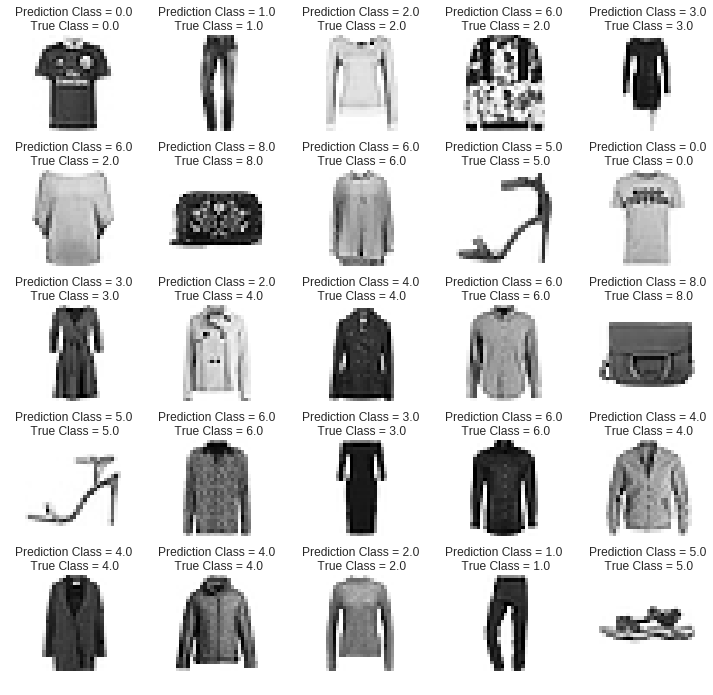

In [71]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


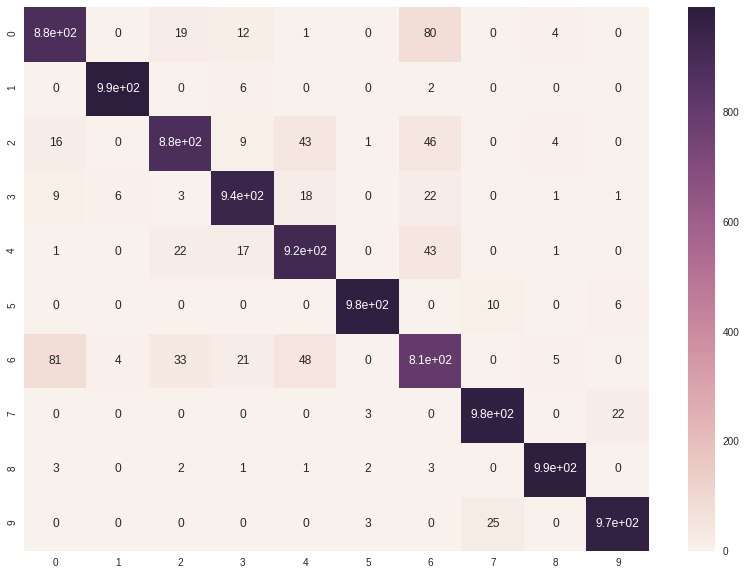

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [73]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.89      0.88      0.89      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.92      0.88      0.90      1000
    Class 3       0.93      0.94      0.94      1000
    Class 4       0.89      0.92      0.90      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.80      0.81      0.81      1000
    Class 7       0.97      0.97      0.97      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000



It's apparent that our model is underperforming for class 6 in terms of precision,recall and f1 score. For class 0, classifier is slightly lacking precision whereas it is slightly lacking precision for class 4.

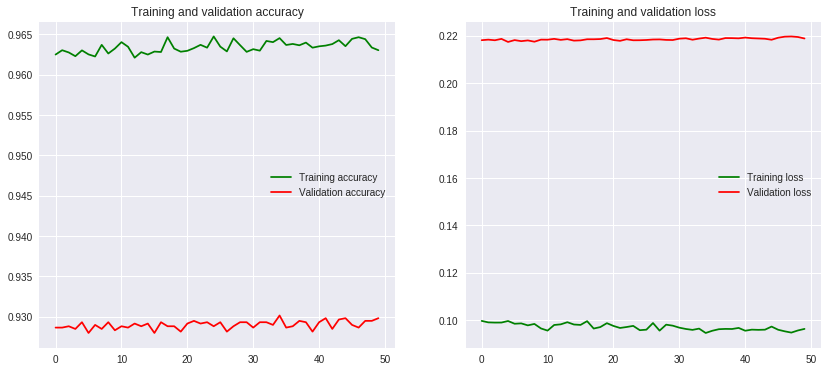

In [79]:
def plot_accuracy_and_loss(history):
    hist = history.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.